**Name:** Water Potability Classifier

**Author:** Sharome Burton

**Date:** 07/21/2021

**Description:** Machine learning model used to determine whether water is safe to drink.

**Kaggle:** https://www.kaggle.com/sharomeethan/water-potability-classifier/

## 1. Problem definition
> How accurately can we classify whether a sample from a body of water is potable, given its chemical and physical characteristics?

## 2. Context

Access to safe drinking-water is essential to health, a basic human right and a component of effective policy for health protection. This is important as a health and development issue at a national, regional and local level. In some regions, it has been shown that investments in water supply and sanitation can yield a net economic benefit, since the reductions in adverse health effects and health care costs outweigh the costs of undertaking the interventions.

## 3. Data
`water_potability.csv` - contains water quality metrics for 3276 different water bodies. 

source: https://www.kaggle.com/adityakadiwal/water-potability



## 4. Features

**1. `pH value`:**

PH is an important parameter in evaluating the acid–base balance of water. It is also the indicator of acidic or alkaline condition of water status. WHO has recommended maximum permissible limit of pH from 6.5 to 8.5. The current investigation ranges were 6.52–6.83 which are in the range of WHO standards.

**2. `Hardness`:**

Hardness is mainly caused by calcium and magnesium salts. These salts are dissolved from geologic deposits through which water travels. The length of time water is in contact with hardness producing material helps determine how much hardness there is in raw water. Hardness was originally defined as the capacity of water to precipitate soap caused by Calcium and Magnesium.

**3. `Solids` (Total dissolved solids - TDS):**

Water has the ability to dissolve a wide range of inorganic and some organic minerals or salts such as potassium, calcium, sodium, bicarbonates, chlorides, magnesium, sulfates etc. These minerals produced un-wanted taste and diluted color in appearance of water. This is the important parameter for the use of water. The water with high TDS value indicates that water is highly mineralized. Desirable limit for TDS is 500 mg/l and maximum limit is 1000 mg/l which prescribed for drinking purpose.

**4. `Chloramines`:**

Chlorine and chloramine are the major disinfectants used in public water systems. Chloramines are most commonly formed when ammonia is added to chlorine to treat drinking water. Chlorine levels up to 4 milligrams per liter (mg/L or 4 parts per million (ppm)) are considered safe in drinking water.

**5. `Sulfate`:**

Sulfates are naturally occurring substances that are found in minerals, soil, and rocks. They are present in ambient air, groundwater, plants, and food. The principal commercial use of sulfate is in the chemical industry. Sulfate concentration in seawater is about 2,700 milligrams per liter (mg/L). It ranges from 3 to 30 mg/L in most freshwater supplies, although much higher concentrations (1000 mg/L) are found in some geographic locations.

**6. `Conductivity`:**

Pure water is not a good conductor of electric current rather’s a good insulator. Increase in ions concentration enhances the electrical conductivity of water. Generally, the amount of dissolved solids in water determines the electrical conductivity. Electrical conductivity (EC) actually measures the ionic process of a solution that enables it to transmit current. According to WHO standards, EC value should not exceeded 400 μS/cm.

**7. `Organic_carbon`:**

Total Organic Carbon (TOC) in source waters comes from decaying natural organic matter (NOM) as well as synthetic sources. TOC is a measure of the total amount of carbon in organic compounds in pure water. According to US EPA < 2 mg/L as TOC in treated / drinking water, and < 4 mg/Lit in source water which is use for treatment.

**8. `Trihalomethanes`:**

THMs are chemicals which may be found in water treated with chlorine. The concentration of THMs in drinking water varies according to the level of organic material in the water, the amount of chlorine required to treat the water, and the temperature of the water that is being treated. THM levels up to 80 ppm is considered safe in drinking water.

**9. `Turbidity`:**

The turbidity of water depends on the quantity of solid matter present in the suspended state. It is a measure of light emitting properties of water and the test is used to indicate the quality of waste discharge with respect to colloidal matter. The mean turbidity value obtained for Wondo Genet Campus (0.98 NTU) is lower than the WHO recommended value of 5.00 NTU.

**10. `Potability` (Target) :**

Indicates if water is safe for human consumption where 1 means Potable and 0 means Not potable.
   
## 4. Evaluation 

> **Goal:** Determine whether a sample of water is potable at >75% precision.



In [12]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/water-potability/water_potability.csv


## Import Libraries

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

from xgboost.sklearn import XGBClassifier
from catboost import CatBoostClassifier

import warnings
warnings.simplefilter("ignore")
%matplotlib inline


## Import data

In [14]:
df_raw = pd.read_csv("../input/water-potability/water_potability.csv")
df_raw

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1


## Exploratory data analysis (EDA)

In [15]:
# Checking data types
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [16]:
# Check for missing data
df_raw.isna().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

We have incomplete data for pH, sulfate, and trihalomethanes, so we must do some further analysis to figure out what we must replace that data with.

39.01 % of samples are potable (1)


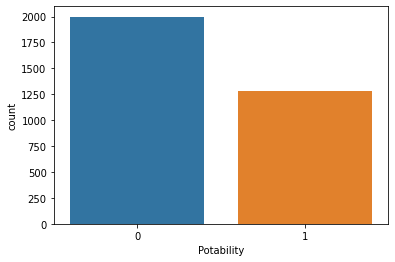

In [17]:
# Count distribution of target variable
sns.countplot(x=df_raw["Potability"])


print(f'{df_raw.Potability[df_raw.Potability==1].count()/df_raw.Potability.count()*100:.2f} % of samples are potable (1)')

<AxesSubplot:>

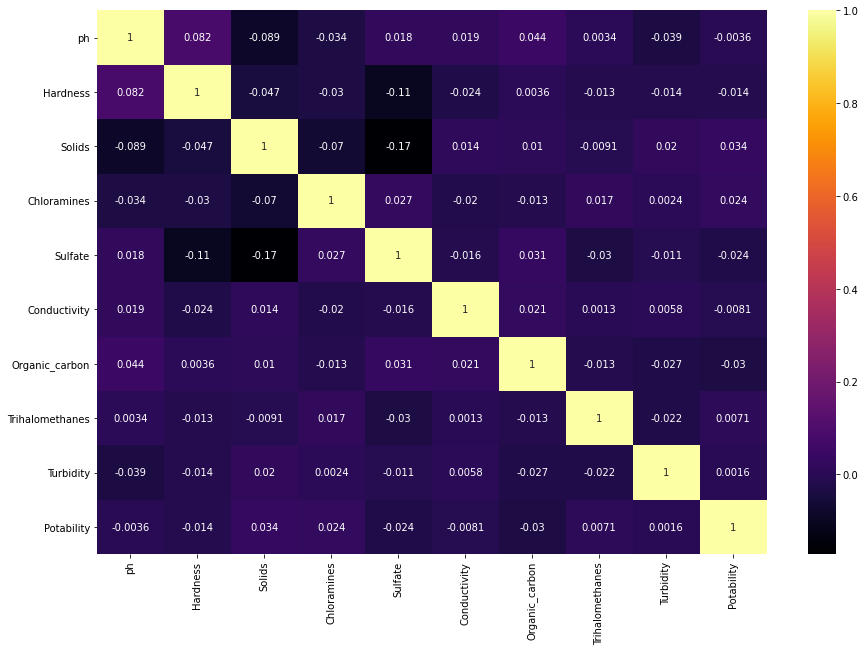

In [18]:
# Correlation matrix for dataset
plt.figure(figsize=(15,10))
sns.heatmap(df_raw.corr(), annot=True, cmap="inferno")

Correlation matrix shows weak correlation between features suggesting that they are reasonably independent of eachother. There is no multicollinearity.

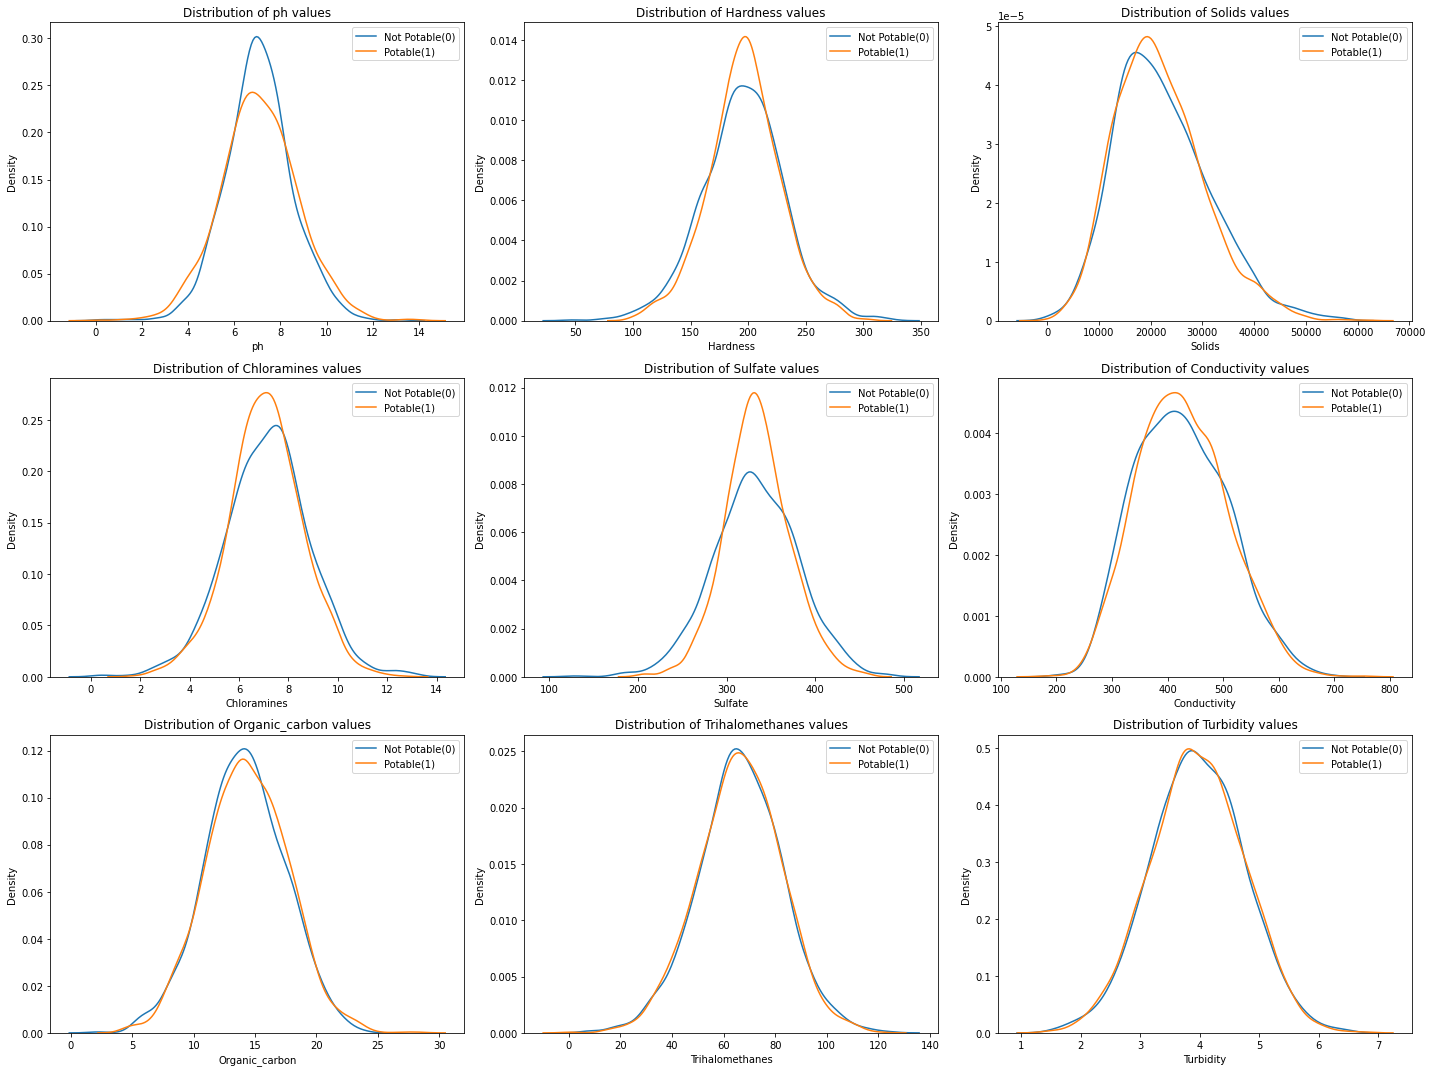

In [19]:
# Distribution of features
potable = df_raw.query('Potability == 0')
not_potable = df_raw.query('Potability == 1')

fig = plt.figure(figsize=(20,15))

for ax,column in enumerate(df_raw.columns[:9]):
    plt.subplot(3,3,ax+1)
    plt.title(f'Distribution of {column} values')
    sns.kdeplot(x=not_potable[column],label='Not Potable(0)')
    sns.kdeplot(x=potable[column],label='Potable(1)')
    plt.legend(prop=dict(size=10))

    
plt.tight_layout()


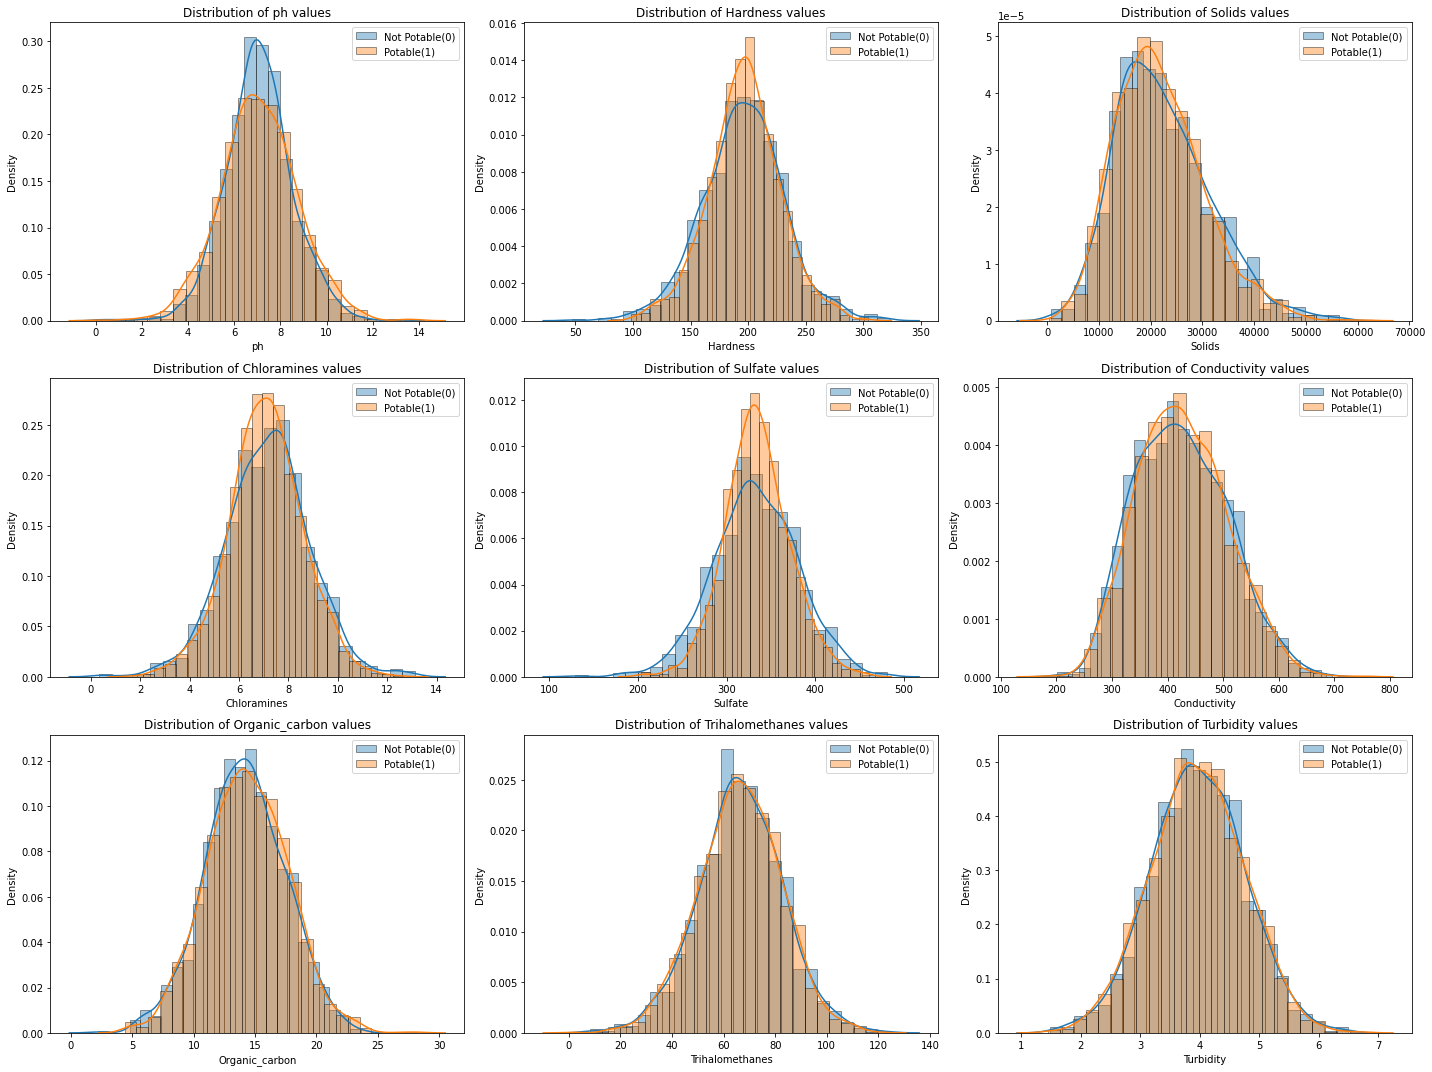

In [20]:
fig = plt.figure(figsize=(20,15))

for ax,column in enumerate(df_raw.columns[:9]):
    plt.subplot(3,3,ax+1)
    plt.title(f'Distribution of {column} values')
    sns.distplot(not_potable[column], label='Not Potable(0)', hist_kws=dict(edgecolor='k', linewidth=1), bins=25)
    sns.distplot(potable[column], label='Potable(1)', hist_kws=dict(edgecolor='k', linewidth=1), bins=25)
    plt.legend(prop=dict(size=10))

plt.tight_layout()

Data shows reasonably normal distribution for all features.

## Imputing missing data

In [21]:
def fill_nan(df):
    for index, column in enumerate(df.columns[:9]):
        # print(index, column)
        df[column] = df[column].fillna(df.groupby('Potability')[column].transform('mean'))
    return df
        
df = fill_nan(df_raw)

df.isna().sum()  

        
                                                         
                                                      

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

## Splitting, balancing and scaling data

In [22]:
# Splitting
X = df.drop(['Potability'], axis = 1)
y = df['Potability']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=18, stratify=y) #stratify=y

# Balancing data - oversampling minority
smt = SMOTE()
X_train, y_train = smt.fit_resample(X_train, y_train)

# Scaling
sc = StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)


## Training models
We will try:
   * Logistic Regression
   * K-Nearest Neighbors
   * Random Forest Classifier
   * Decision Tree Classifier
   * Naive Bayes
   * ExtraTreesClassifier
   * XGB Classifier
   * CatBoostClassifier



In [23]:
# Put models in a dictionary
models = {"Logistic Regression": LogisticRegression(),
         "KNN": KNeighborsClassifier(),
         "Random Forest": RandomForestClassifier(),
         "Decision Tree": DecisionTreeClassifier(),
         "Naive Bayes": GaussianNB(),
         "ExtraTreesClassifier": ExtraTreesClassifier(),
         "xgb Classifier": XGBClassifier(),
         "CatBoostClassifier": CatBoostClassifier()}


# Create a function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
   
    """
   Fits and evaluates given machine learning models.
   models: a dict of different Scikit_Learn machine learning models
   X_train: training data (no labels)
   X_test: testing data (no labels)
   y_train: training labels
   y_test: test labels
   """ 
    # Set random seed
    np.random.seed(18)
    # Make a dictionary to keep model scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        # Fit model to data
        model.fit(X_train, y_train)
        # Evaluate model and append its score to model_scores
        model_scores[name] = cross_val_score(model,
                                             X_test,
                                             y_test,
                                            scoring='accuracy',
                                            cv=5
                                            ).mean()

    return model_scores

In [24]:
model_scores = fit_and_score(models,X_train,X_test,y_train,y_test)

model_scores

[07:53:21] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[07:53:21] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[07:53:21] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[07:53:22] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

{'Logistic Regression': 0.6129432889420918,
 'KNN': 0.6068158012868472,
 'Random Forest': 0.7777944037109082,
 'Decision Tree': 0.7301436480622474,
 'Naive Bayes': 0.6300613496932514,
 'ExtraTreesClassifier': 0.6691306299566063,
 'xgb Classifier': 0.7924435133921891,
 'CatBoostClassifier': 0.7899895256621277}

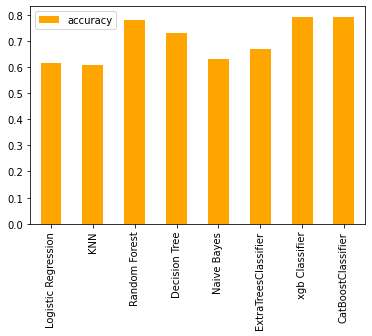

In [25]:
model_compare = pd.DataFrame(model_scores, index=["accuracy"])
model_compare.T.plot.bar(color="orange");

The XGB Classifier seems to show the most promise with about 79% accuracy after 5 folds of cross-validation.

## Hyperparameter Tuning

In [ ]:
np.random.seed(18)

# Create a hyperparameter grid for XGB Classifier
xgb_grid = {"learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ]}


# Setup random hyperparameter search for XGB Classifier
rs_xgb = RandomizedSearchCV(XGBClassifier(),
                                param_distributions=xgb_grid,
                                cv=2,
                                n_iter=100,
                                verbose=0
                               )

# Fit random hyperparameter search model for XGB Classifier
rs_xgb.fit(X_train, y_train)

# Find best hyperparamaters
rs_xgb.best_params_



[07:53:39] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[07:53:40] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[07:53:40] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[07:53:40] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

In [ ]:
rs_xgb.score(X_test, y_test)

Rough hyperparameter tuning showed no improvement on baseline XGB Classifier model

In [ ]:
# Final model - XGBClassifier

model = XGBClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [ ]:
# Confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap="inferno")

In [ ]:
# Classification report
print(classification_report(y_test, y_pred))

## Conclusion

Final model shows a reasonable **accuracy** of **79%** with an **f1-score** of **0.78**, passing the evaluation metric.


## Feature importance

In [ ]:
# Helper function for plotting feature importance
def plot_features(columns, importances,n=20):
    df = (pd.DataFrame({"features": columns,
                       "feature_importances": importances})
         .sort_values("feature_importances", ascending=False)
         .reset_index(drop=True))
    # Plot dataframe
    fix, ax = plt.subplots()
    ax.barh(df["features"][:n], df["feature_importances"][:20])
    ax.set_ylabel("Features")
    ax.set_xlabel("Feature Importance")
    ax.invert_yaxis()
    
plot_features(df.drop(['Potability'],axis=1).columns, model.feature_importances_)

`Sulfate` and `pH` levels seem to be the biggest indicator of the potability of the water samples.